In [75]:

# evaluate model performance with outliers removed using isolation forest
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors


In [83]:
data_DEV = pd.read_csv("machine_learning/DEVELOP_machine_learning_charlie")
data_PRE = pd.read_csv("machine_learning/PREPRODUCCION_machine_learning_charlie")
data_PRO = pd.read_csv("machine_learning/PRODUCCION_machine_learning_charlie")
data_PRU = pd.read_csv("machine_learning/PRUEBAS_machine_learning_charlie")
data_QAS = pd.read_csv("machine_learning/QASERVER_machine_learning_charlie")
Cs = np.array([data_DEV.shape[0],data_PRE.shape[0],data_PRO.shape[0],data_PRU.shape[0],data_QAS.shape[0]])
Cmin = Cs.min()
array = np.arange(Cmin,data_DEV.shape[0])
data_DEV = data_DEV.drop(data_DEV.index[array])
array = np.arange(Cmin,data_PRE.shape[0])
data_PRE = data_PRE.drop(data_PRE.index[array])
array = np.arange(Cmin,data_PRO.shape[0])
data_PRO = data_PRO.drop(data_PRO.index[array])
array = np.arange(Cmin,data_PRU.shape[0])
data_PRU = data_PRU.drop(data_PRU.index[array])
array = np.arange(Cmin,data_QAS.shape[0])
data_QAS = data_QAS.drop(data_QAS.index[array])

In [78]:
data_DEV

,@timestamp,grad_total_bytes,grad_Swap,out_bytes
0,2023-03-01 00:00:00,NaN,0.000000,0.416393
1,2023-03-01 00:10:00,NaN,0.002014,0.416393
2,2023-03-01 00:20:00,NaN,0.002014,0.832970
3,2023-03-01 00:30:00,NaN,0.000000,0.832970
4,2023-03-01 00:40:00,NaN,0.000000,0.832970
...,...,...,...,...
4453,2023-03-31 22:10:00,NaN,0.001053,0.649866
4454,2023-03-31 22:20:00,NaN,0.017006,0.649993
4455,2023-03-31 22:30:00,NaN,0.040621,0.325064
4456,2023-03-31 22:40:00,NaN,0.020437,0.433491


In [88]:
# max(data_PRE["grad_total_bytes"])
# max(data_PRO["grad_total_bytes"])
# max(data_PRU["grad_total_bytes"])
# max(data_PRU["grad_total_bytes"])

0.0566553977461659

In [73]:
data_DEV["out_bytes"] = data_DEV["out_bytes"]/max(data_DEV["out_bytes"])
data_DEV["grad_Swap"] = data_DEV["grad_Swap"]/max(data_DEV["grad_Swap"])

# data_DEV["grad_total_bytes"] = data_DEV["grad_total_bytes"]/max(data_DEV["grad_total_bytes"])

data_PRE["out_bytes"] = data_PRE["out_bytes"]/max(data_PRE["out_bytes"])
data_PRE["grad_Swap"] = data_PRE["grad_Swap"]/max(data_PRE["grad_Swap"])
# data_PRE["grad_total_bytes"] = data_PRE["grad_total_bytes"]/max(data_PRE["grad_total_bytes"])

data_PRO["out_bytes"] = data_PRO["out_bytes"]/max(data_PRO["out_bytes"])
data_PRO["grad_Swap"] = data_PRO["grad_Swap"]/max(data_PRO["grad_Swap"])
data_PRO["grad_total_bytes"] = data_PRO["grad_total_bytes"]/max(data_PRO["grad_total_bytes"])

data_PRU["out_bytes"] = data_PRU["out_bytes"]/max(data_PRU["out_bytes"])
data_PRU["grad_Swap"] = data_PRU["grad_Swap"]/max(data_PRU["grad_Swap"])
data_PRU["grad_total_bytes"] = data_PRU["grad_total_bytes"]/max(data_PRU["grad_total_bytes"])

data_PRU["out_bytes"] = data_PRU["out_bytes"]/max(data_PRU["out_bytes"])
data_PRU["grad_Swap"] = data_PRU["grad_Swap"]/max(data_PRU["grad_Swap"])
data_PRU["grad_total_bytes"] = data_PRU["grad_total_bytes"]/max(data_PRU["grad_total_bytes"])

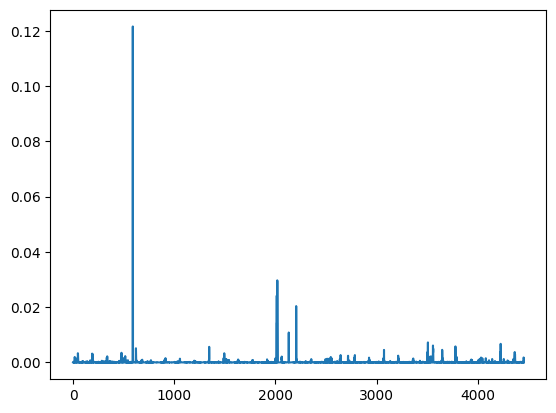

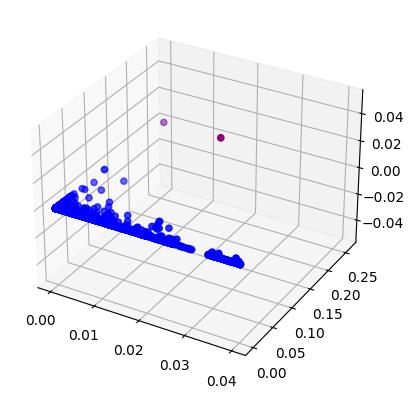

In [92]:
X = np.vstack([data_DEV["out_bytes"], data_DEV["grad_Swap"],data_DEV["grad_total_bytes"]]).T

nbrs = NearestNeighbors(n_neighbors=7).fit(X)
distances, indices = nbrs.kneighbors(X)

promedios = distances.mean(axis = 1)
plt.plot(promedios)
outlier_index = np.where(promedios > 0.05)
outlier_index = outlier_index[0].tolist()
outlier_out = data_DEV["out_bytes"].iloc[outlier_index]
outlier_swap = data_DEV["grad_Swap"].iloc[outlier_index]
outlier_total = data_DEV["grad_total_bytes"].iloc[outlier_index]



fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data_DEV["out_bytes"], data_DEV["grad_Swap"], data_DEV["grad_total_bytes"], color="b")
ax.scatter(outlier_out, outlier_swap, outlier_total, color="r")

# plt.scatter(memory, cpu, color="b")
# plt.scatter(outlier_memory, outlier_cpu, color = "r")